## Test a class for the easy retrieval of postgres data via Jupyter widgets


# Playground

In [1]:
# the following two lines indicate that external functions are auto-reloaded as soon as they change. 
%load_ext autoreload
%autoreload 2
# Print statements 
from __future__ import print_function # Python 2.x

In [3]:
# General stuff:
import sys
import argparse
import os
import json
import numpy as np
import math
import psycopg2
import numpy as np
import pandas as pd
from datetime import date
from tqdm import tqdm_notebook

# Plotting:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# External functions from subfolder /database_helpers. 
# as soon as you change something in there and press save, it will auto reload on next execution.
from database_helpers.psql_start import *
from database_helpers.create_tables import *
from database_helpers.write2tables import *
from postgres_analysis_helpers.general import *
from postgres_analysis_helpers.get_data import *

# register pickle type to retrieve binary data from database
psycopg2.extensions.register_type(psycopg2.extensions.new_type(psycopg2.BINARY.values, 'BINARY-PICKLE', cast_pickle))

Loaded analysis helpers: General
Loaded postgres_analysis_helpers -> general
Loaded postgres_analysis_helpers -> get_data


In [4]:
db_status = test_connect()
if db_status == False:
    print('Grrr... no database connection could be established.')
else:
    print('Yippiyeah! Database connection is established!')

Connecting to the PostgreSQL database...
Yippiyeah! Database connection is established!


### Make an empty dataframe and call the retrieval function

In [5]:
base_dataframe = pd.DataFrame() # create empty dataframe or feed in a base dataframe from before! 

In [6]:
psql = psql_neuroballs(base_dataframe)

78 animals across 5 experimenters found.
Total # of sessions: 8573 (unique clusters: 15271)


In [7]:
psql.retrieve_data()

VBox(children=(HBox(children=(SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='100px'), options=('ragnihiij', 'davidcr', 'horsto', 'torstsl', 'giuliaq'), value=()), SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='100px'), options=('07062', '54417', '54731', '55387', '55579', '55640', '55903', '55905', '55949', '56109', '56276', '56814', '56900', '57088', '57089', '57090', '57835', '57836', '57837', '57841', '58313', '58863', '58907', '59338', '59339', '59379', '59380', '59381', '59383', '59384', '59388', '59389', '59390', '59391', '59392', '59393', '59394', '59399', '70110', '70113', '70114', '70258', '70261', '70375', '70644', '70645', '71343', '71379', '71461', '71462', '71710', '72254', '72255', '72257', '72877', '72878', '73219', '73220', '73221', '73222', '73358', '73359', '73639', '74470', '74471', '74472', '74473', '74565', '74566', '74933', '74935', '74956', '7898', '7945', 'T4683', 'T4743', 'T4934', 'T4935'), value=()), SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='200px'), options={'LFP': 'lfp_tb', 'Tracking': 'tracking_tb', 'Spiketimes + Tracking': 'spiketimes_tracking_tb', 'Theta Phase Tuning': 'phase_tuning_tb', 'Interspike interval stats': 'ISI_tb', 'Spiketime autocorr': 'st_autocorr_tb', 'HD tuning stats': 'hd_tuning_tb', 'Ratemaps (KLUSTA)': 'ratemaps_tb', 'Spatial autocorr': 'autocorr_gs_tb', 'Waveforms': 'waveforms_tb', 'Stimulus stats': 'stimulus_tb', 'Stimulus mats': 'stimulus_mat_tb', 'BNT all (NEW!)': 'BNT_tb_screen', 'Waveform stats': 'waveforms_stats_tb'}, value=()), SelectMultiple(layout=Layout(align_items='stretch', display='flex', flex_flow='row', height='150px', width='240px'), options=('Select a table to the left',), value=()), Textarea(value="NOT LIKE '%las%'", layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='150px'), placeholder='Type filter for session_name'))), HBox(children=(Button(description='Print selection', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='15%', width='10%'), style=ButtonStyle(), tooltip='Click here to show which entries you marked for retrieval'), Button(description='Get cursor', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='15%', width='10%'), style=ButtonStyle(), tooltip='Click here to get a cursor instead of a dataset'), Button(button_style='info', description='Get ze data!', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='15%', width='10%'), style=ButtonStyle(), tooltip='Click here to retrieve data from the database')))), layout=Layout(align_items='stretch', border='', display='flex', flex_flow='columns', height='200px', width='100%'))

In [112]:
base_dataframe = psql.data()

In [113]:
base_dataframe.animal_id.unique()

array(['T4743', 'T4935', 'T4934'], dtype=object)

In [114]:
base_dataframe

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,change_point_ms,counter_stimuli,stim_freq,stim_length,...,sample_rate_inp,ibi,salt_window,stats_p_inhib_40,ex_latency_var,ex_latency_mean,ex_latency_median,salt_p,sample_rate,inhibited
0,8,T4743,davidcr,2016-12-05 10:45:09,24,05122016laserSess2,0.437500,4768,3.401361,20.0,...,16000.0,274.0,10.0,0.029086,NaN,NaN,NaN,0.984211,48000.0,True
1,8,T4743,davidcr,2016-12-05 10:45:09,30,05122016laserSess2,0.979167,4768,3.401361,20.0,...,16000.0,274.0,10.0,0.451488,NaN,NaN,NaN,0.910526,48000.0,True
2,7,T4743,davidcr,2016-11-14 14:13:23,3,14112016laserSess2,0.833333,6951,3.401361,20.0,...,16000.0,274.0,10.0,0.004274,NaN,NaN,NaN,0.957895,48000.0,True
3,8,T4743,davidcr,2016-11-14 14:13:23,27,14112016laserSess2,-0.062500,6951,3.401361,20.0,...,16000.0,274.0,10.0,0.003744,NaN,NaN,NaN,1.000000,48000.0,True
4,7,T4743,davidcr,2016-11-14 14:13:23,30,14112016laserSess2,0.875000,6951,3.401361,20.0,...,16000.0,274.0,10.0,0.013554,NaN,NaN,NaN,1.000000,48000.0,True
5,8,T4743,davidcr,2016-11-14 14:13:23,30,14112016laserSess2,1.270833,6951,3.401361,20.0,...,16000.0,274.0,10.0,0.000106,NaN,NaN,NaN,0.978947,48000.0,True
6,7,T4743,davidcr,2016-11-14 14:13:23,35,14112016laserSess2,0.770833,6951,3.401361,20.0,...,16000.0,274.0,10.0,0.007460,NaN,NaN,NaN,1.000000,48000.0,True
7,8,T4743,davidcr,2016-11-14 14:13:23,34,14112016laserSess2,0.458333,6951,3.401361,20.0,...,16000.0,274.0,10.0,0.000017,NaN,NaN,NaN,0.689474,48000.0,True
8,7,T4743,davidcr,2016-11-14 14:13:23,36,14112016laserSess2,NaN,6951,3.401361,20.0,...,16000.0,274.0,10.0,0.042682,NaN,NaN,NaN,0.231579,48000.0,False
9,8,T4743,davidcr,2016-11-14 14:13:23,8,14112016laserSess2,NaN,6951,3.401361,20.0,...,16000.0,274.0,10.0,0.204701,NaN,NaN,NaN,0.857895,48000.0,False


In [115]:
inhib_p_thresh = 0.001
latency_thresh = 3
original_len = len(base_dataframe)
base_dataframe = base_dataframe.dropna(subset=['tetrode_no','cluster_no'])
base_dataframe.sort_values('inhib_lowest_p',ascending=True, inplace=True)
base_dataframe.drop_duplicates(subset=['session_ts','animal_id','tetrode_no','cluster_no'],inplace=True)
base_dataframe.reset_index(drop=True,inplace=True)
base_dataframe['inhibited'] = (base_dataframe.inhib_lowest_p < inhib_p_thresh) & (base_dataframe.inhibited == True)
print('There are now {} cells in the dataframe (original: {}).'.format(len(base_dataframe),original_len))

There are now 197 cells in the dataframe (original: 207).


### Inhibited cells only

In [116]:
base_dataframe = base_dataframe[base_dataframe.inhibited == True]
print('There are {} inhibited cells in this dataframe.'.format(len(base_dataframe)))

There are 83 inhibited cells in this dataframe.


### Now drop "session_name" and retrieve the base sessions...

In [117]:
base_dataframe.drop('session_name',1,inplace=True)

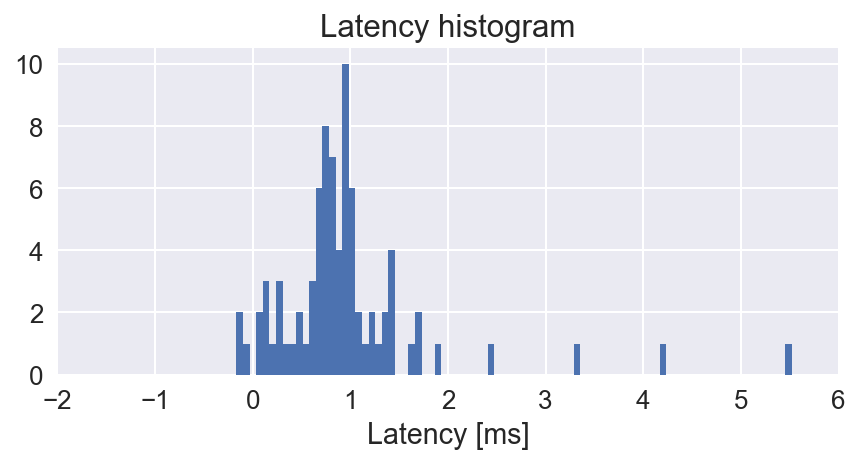

In [118]:
# Draw quick latency histogram:
plt.figure(figsize=(7,3))
plt.hist(base_dataframe.change_point_ms,200)
plt.xlim(-2,6)
plt.title('Latency histogram')
plt.xlabel('Latency [ms]')

In [119]:
psql = psql_neuroballs(base_dataframe)
psql.retrieve_data()

69 animals across 6 experimenters found!
Total # of 8598 sessions (unique clusters: 14315)
Length of input dataframe: 83


Retrieving data ... Dataframe not empty


Success. NaNs: 15



In [120]:
base_dataframe = psql.data()

In [31]:
#base_dataframe_inhib.dropna(subset=['theta_strength','theta_mean_phase','calbindin','gridscore'],inplace=True)

In [132]:
base_dataframe.dropna(subset=['theta_mean_phase_bnt','theta_strength_bnt','grid_score_bnt'],inplace=True)

calbindin = base_dataframe[base_dataframe.calbindin_bnt == 1]
stellate = base_dataframe[base_dataframe.calbindin_bnt == 0]
rest = base_dataframe[pd.isnull(base_dataframe.calbindin_bnt)]
print('Classifier results: {} Calbindin, {} Stellate, {} Unidentified'.format(len(calbindin),len(stellate),len(rest)))

Classifier results: 24 Calbindin, 42 Stellate, 0 Unidentified


In [133]:
#Save the 4 datasets: base_dataframe_inhib, calbindin,stellate,rest

#export_path_pickle  = r"C:\work\python\klusta_analysis\postgres_notebooks\export_dataframes\dave_arch"
#export_path_pickle = "/".join(export_path_pickle.split("\\"))
#base_dataframe_inhib.to_pickle(export_path_pickle + "/all_inhib_arch.pkl")
#calbindin.to_pickle(export_path_pickle + "/calbindin_inhib.pkl")
#stellate.to_pickle(export_path_pickle + "/stellate_inhib.pkl")
#rest.to_pickle(export_path_pickle + "/rest_inhib.pkl")

C:\Users\horsto\AppData\Local\Continuum\Miniconda2\envs\analysis\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


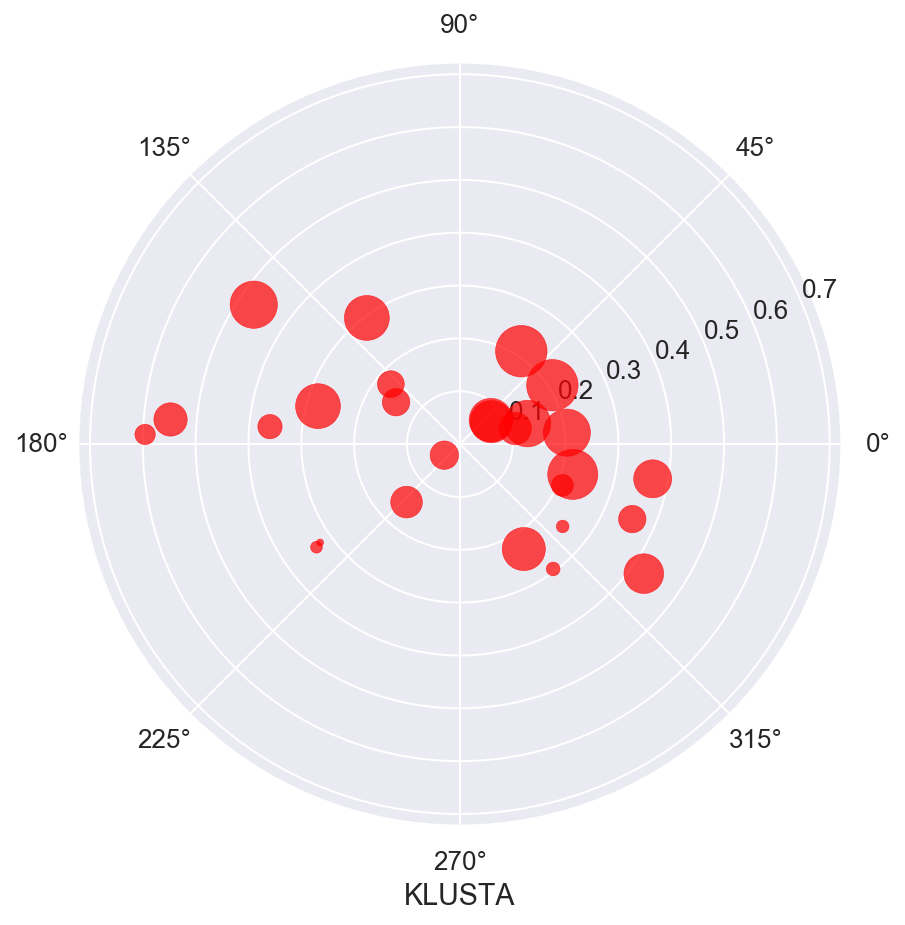

In [134]:
sns.set(font_scale=1.3)
figure = plt.figure(figsize=(15,7))
ax = figure.add_subplot(1,2,1,projection='polar')
ax.scatter([np.mean(x) for x in calbindin.theta_mean_phase_bnt.values],[np.mean(x) for x in calbindin.theta_strength_bnt.values],c='r',s=(calbindin.grid_score_bnt*500).astype(int),alpha=.7,label='Calbindin')
ax.scatter([np.mean(x) for x in stellate.theta_mean_phase_bnt.values],[np.mean(x) for x in stellate.theta_strength_bnt.values],c='r',s=(stellate.grid_score_bnt*500).astype(int),alpha=.7,label='Stellate')
ax.scatter([np.mean(x) for x in rest.theta_mean_phase_bnt.values],[np.mean(x) for x in rest.theta_strength_bnt.values],c='k',s=(rest.grid_score_bnt*500).astype(int),alpha=.7,label='Unclassified')
ax.set_xlabel('KLUSTA')

### If you want a "layer2" dataset, drop the cluster_no column and proceed

In [ ]:
base_dataframe.drop('cluster_no',1,inplace=True)

In [135]:
#base_dataframe.drop(['theta_strength','theta_mean_phase','phase_stats_mean','phase_stats_mvl'],1,inplace=True)

In [ ]:
psql = psql_neuroballs(base_dataframe)
psql.retrieve_data()

In [ ]:
base_dataframe = psql.data()

In [ ]:
base_dataframe.dropna(subset=['phase_stats_mvl','phase_stats_mean'],inplace=True)

In [ ]:
calbindin = base_dataframe[base_dataframe.calbindin == 1]
stellate = base_dataframe[base_dataframe.calbindin == 0]
rest = base_dataframe[pd.isnull(base_dataframe.calbindin)]

In [ ]:
# scatter 
sns.set(font_scale=1.3)
figure = plt.figure(figsize=(15,7))
ax = figure.add_subplot(1,2,1,projection='polar')
ax.scatter(calbindin.phase_stats_mean.values.astype(float),calbindin.phase_stats_mvl.values.astype(float),c='r',s=26,alpha=.7,label='Calbindin')
ax.scatter(stellate.phase_stats_mean.values.astype(float),stellate.phase_stats_mvl.values.astype(float),c='b',s=26,alpha=.7,label='Stellate')
ax.scatter(rest.phase_stats_mean.values.astype(float),rest.phase_stats_mvl.values.astype(float),c='k',s=26,alpha=.7,label='Unclassified')
ax.set_xlabel('KLUSTA')
#ax.set_ylim(0,0.85)

ax = figure.add_subplot(1,2,2,projection='polar')
ax.scatter(calbindin.theta_mean_phase.values.astype(float),calbindin.theta_strength.values.astype(float),c='r',s=26,alpha=.7,label='Calbindin')
ax.scatter(stellate.theta_mean_phase.values.astype(float),stellate.theta_strength.values.astype(float),c='b',s=26,alpha=.7,label='Stellate')
ax.scatter(rest.theta_mean_phase.values.astype(float),rest.theta_strength.values.astype(float),c='k',s=26,alpha=.7,label='Unclassified')
ax.set_xlabel('BNT')

ax.legend(loc=1)
#plt.axis('square')

In [ ]:
# scatter 
sns.set(font_scale=1.3)
figure = plt.figure(figsize=(15,7))
ax = figure.add_subplot(1,2,1)
ax.scatter(base_dataframe.phase_stats_mvl,base_dataframe.theta_strength,c='k',s=26,lw=0,alpha=.77)
ax.set_xlabel('KLUSTA')
ax.set_ylabel('BNT')
ax.set_title('Theta tuning strength')
ax = figure.add_subplot(1,2,2)
ax.scatter(base_dataframe.phase_stats_mean,base_dataframe.theta_mean_phase,c='k',s=26,lw=0,alpha=.77)
ax.set_title('Theta tuning angle')
ax.set_xlabel('KLUSTA')
ax.set_ylabel('BNT')
plt.axis('square')

In [131]:
base_dataframe.head()

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,change_point_ms,counter_stimuli,stim_freq,stim_length,stats_p_inhib_10,...,gridstats_spacing_bnt,gridstats_ellipse_theta_bnt,calbindin_bnt,speedscore_bnt,autocorr_bnt,tc_stats_mvl_bnt,occupancy_map_bnt,informationcontent_bnt,meanrate_outside_fields_bnt,session_name
0,8,T4743,davidcr,2016-11-20 14:30:43,41,0.291667,7806,3.40136,20,0.00279624,...,"[[13.6014705087], [13.152946438], [11.401754251]]",238.56,1,0.0103845,"[[-0.390387786238, -0.244984277612, -0.0825384...",0.0714041,"[[nan, 1.01205483559, 1.2949885403, 1.56877874...",0.281269,0.0756152,20112016s1
1,8,T4743,davidcr,2016-11-20 14:30:43,15,0.270833,7806,3.40136,20,0.000418144,...,"[[12.1655250606], [19.1049731745], [17.2626765...",146.937,1,-0.160565,"[[-0.559159290529, -0.455998482644, -0.3374971...",0.128423,"[[nan, 1.01205483559, 1.2949885403, 1.56877874...",0.235838,0.128865,20112016s1
2,5,T4743,davidcr,2016-11-21 10:46:33,33,0.729167,7547,3.40136,20,0.000872874,...,"[[25.632011236], [25.179356624], [27.8028775489]]",236.894,0,0.0966007,"[[0.82032724245, 0.813143304294, 0.80844284825...",0.0872265,"[[1.88419552188, 1.86245097978, 1.79442203821,...",1.20183,0.345108,21112016s1
3,8,T4743,davidcr,2016-11-13 15:34:10,11,1.02083,6702,3.40136,20,0.000335959,...,"[[15.8113883008], [9.21954445729], [12.5299640...",185.348,0,0.335321,"[[0.0417899332451, 0.261223247677, 0.420659615...",0.154872,"[[1.73299807938, 1.68148807323, 1.58349373708,...",0.300847,0.21253,13112016s1
4,8,T4743,davidcr,2016-11-10 16:30:47,10,0.583333,6631,3.40136,20,9.63796e-05,...,"[[17.88854382], [16.1245154966], [17.4928556845]]",183.295,0,0.111152,"[[-0.356922549826, -0.206655037785, -0.0035548...",0.177507,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",0.576051,0.0512402,10112016s1



Generating plot ...


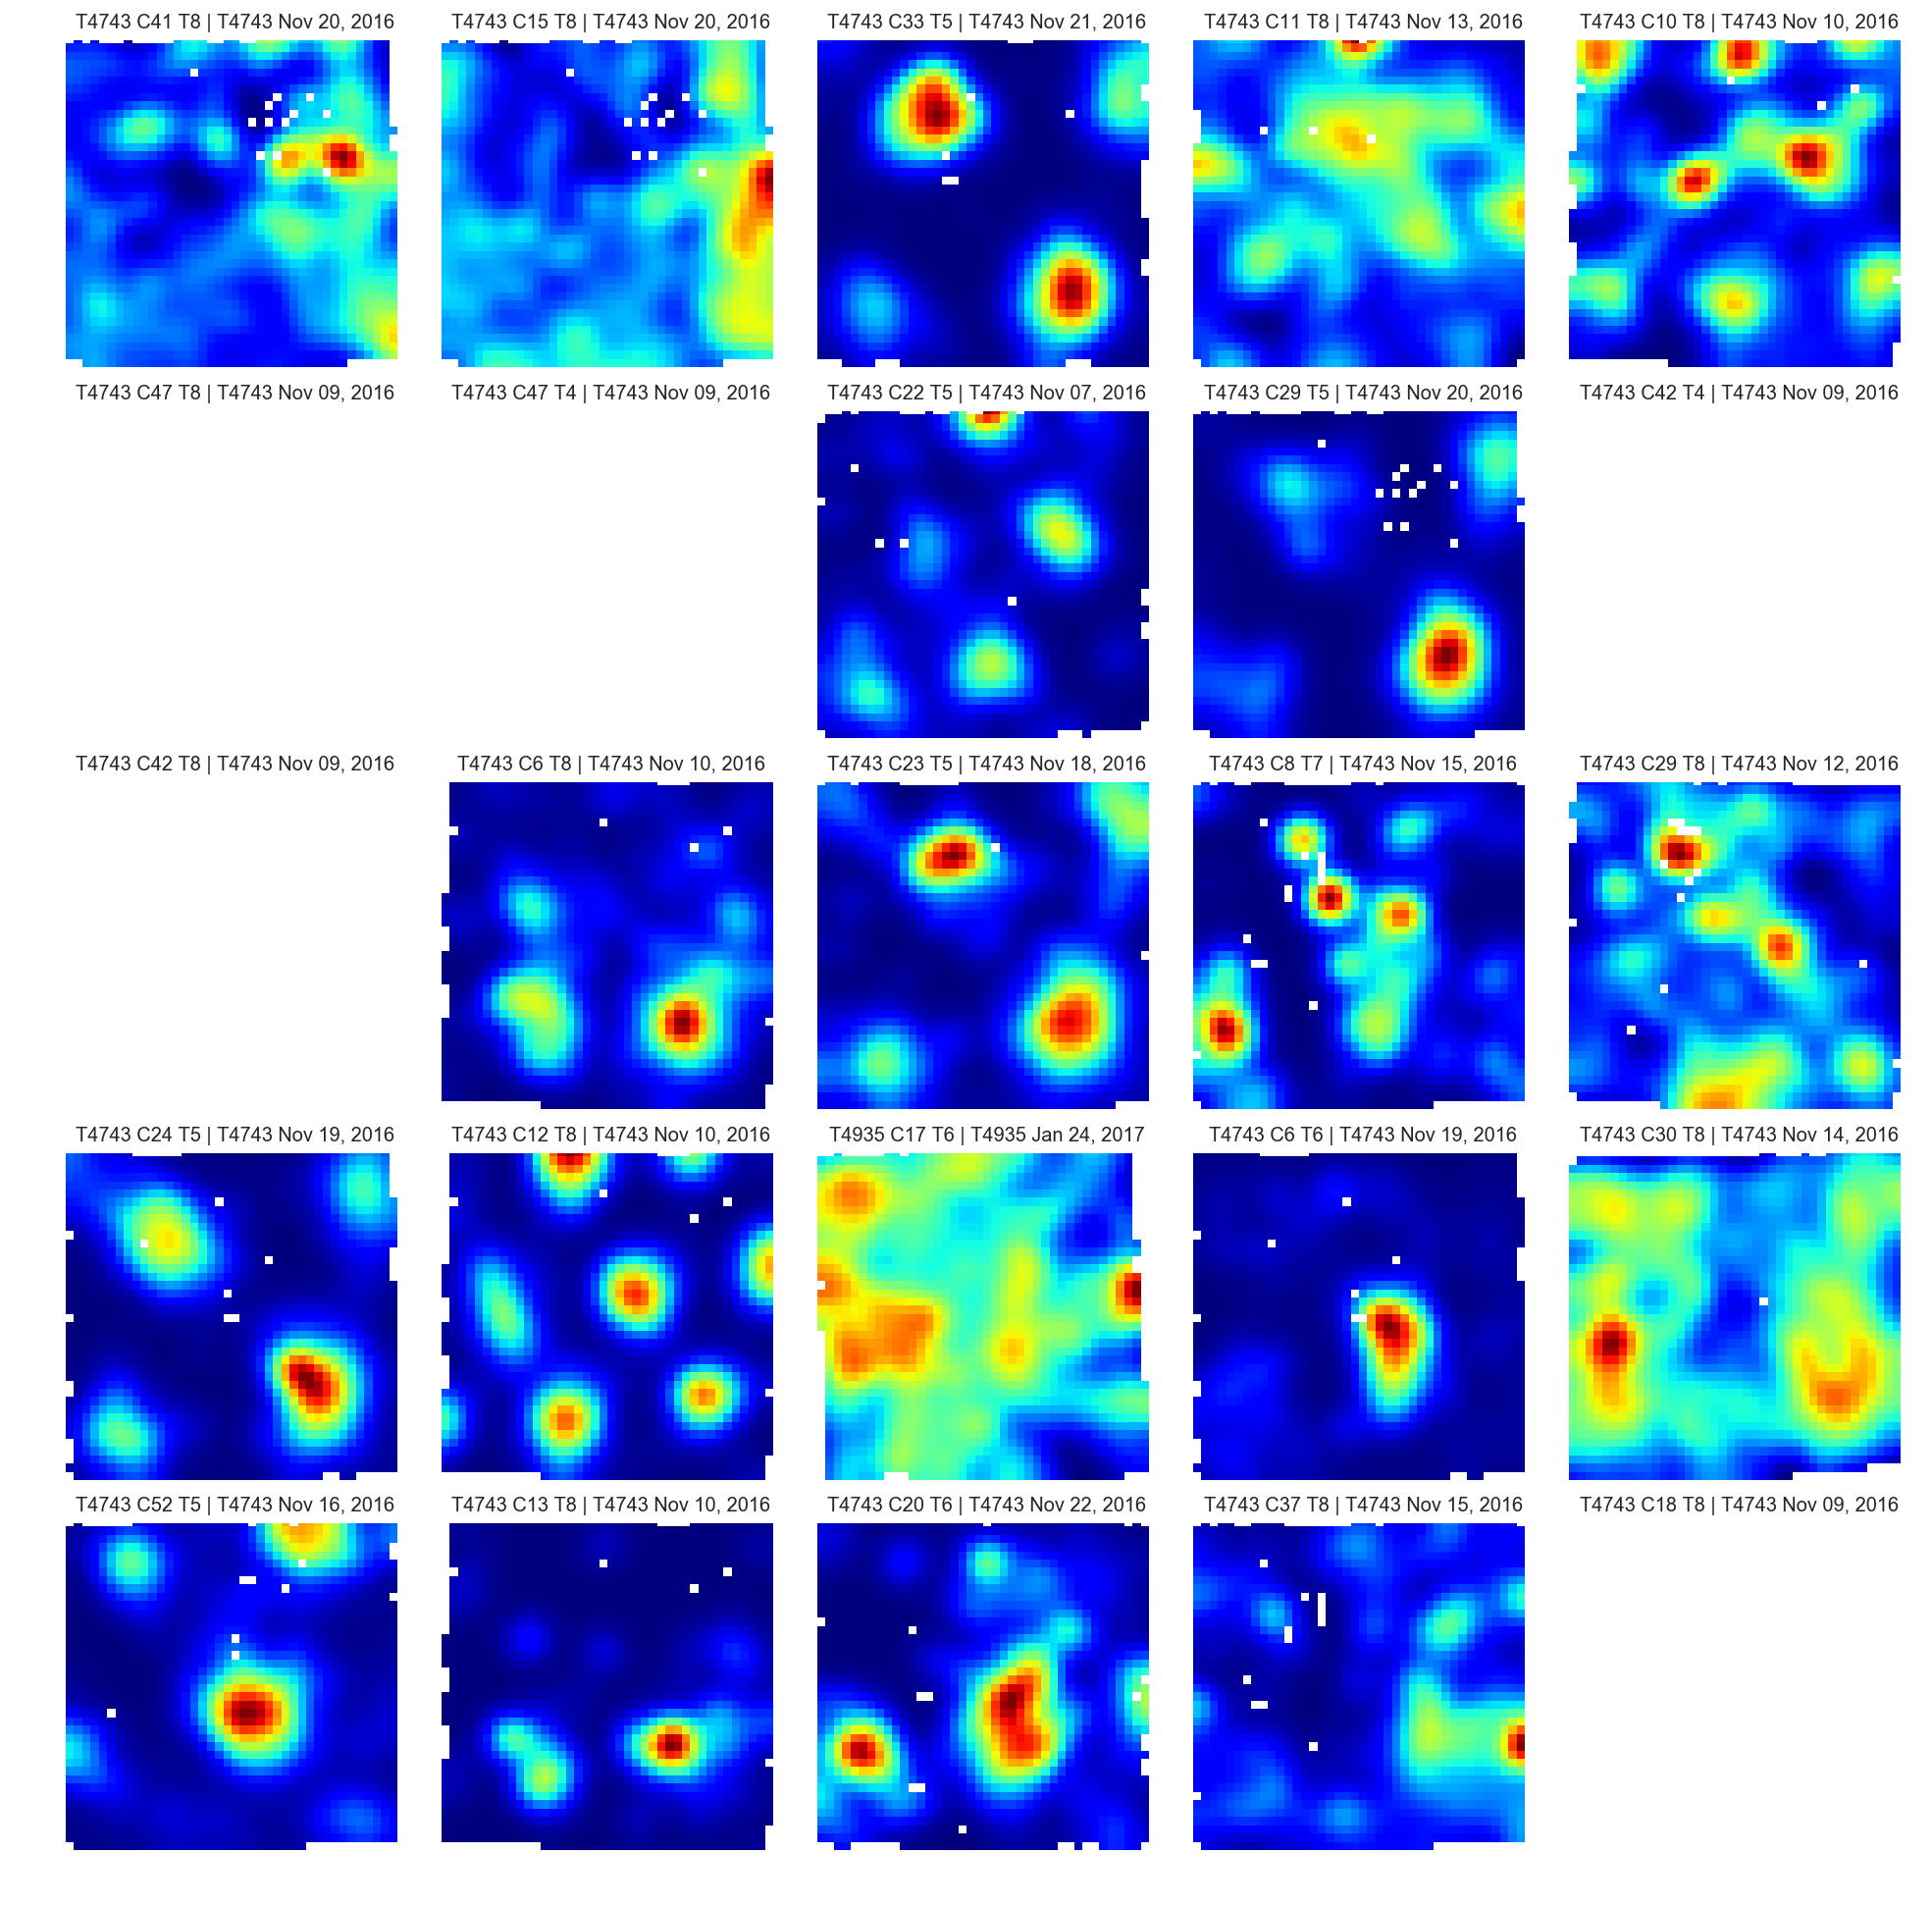

In [128]:
draw_ratemaps(base_dataframe,'masked_ratemap_bnt',25,0)


Generating plot ...


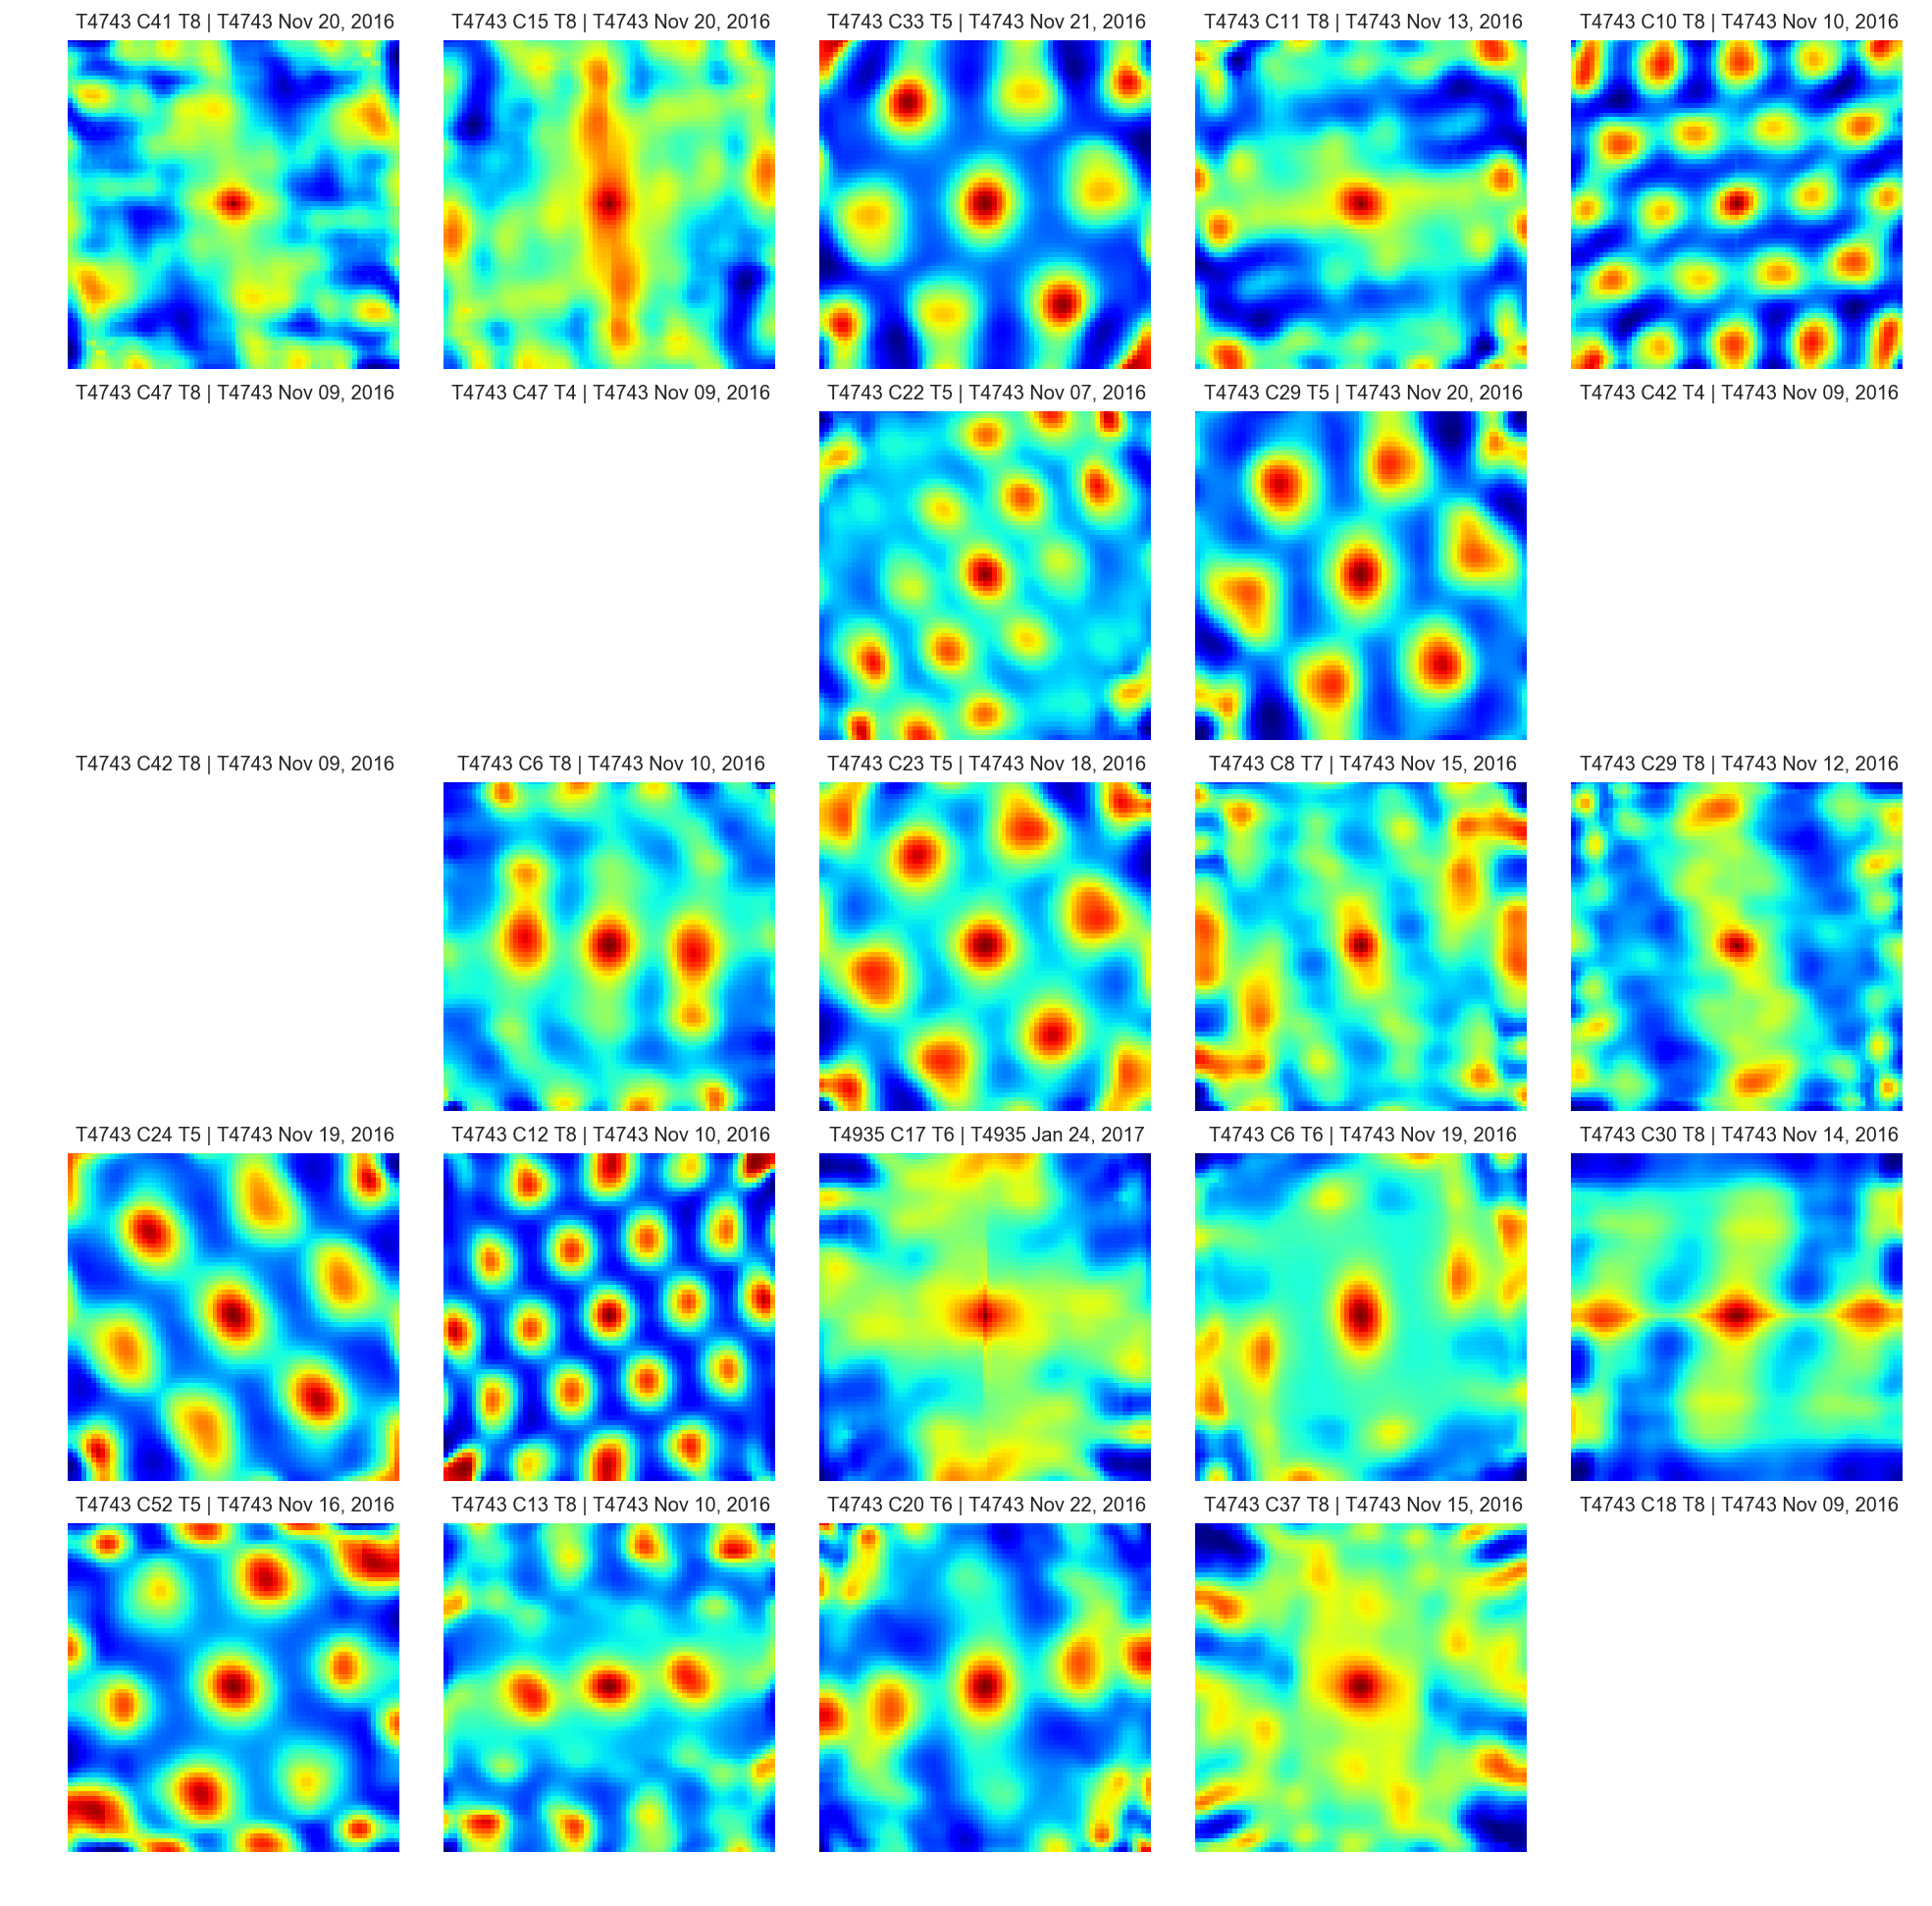

In [130]:
draw_ratemaps(base_dataframe,'autocorr_bnt',25,0)